In [16]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["DiseaseProgression"] = diabetes.target  # Variable objetivo

# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["DiseaseProgression"])  # Variables predictoras
y = df["DiseaseProgression"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de DiseaseProgression: {y.min()}")
print(f"Valor máximo de DiseaseProgression: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["DiseaseProgression"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["DiseaseProgression"].sort_values(ascending=False)
print(f"Correlacion: {correlaciones}")

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)
# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")


Valor mínimo de DiseaseProgression: 25.0
Valor máximo de DiseaseProgression: 346.0
Correlacion: DiseaseProgression    1.000000
bmi                   0.586450
s5                    0.565883
bp                    0.441482
s4                    0.430453
s6                    0.382483
s1                    0.212022
age                   0.187889
s2                    0.174054
sex                   0.043062
s3                   -0.394789
Name: DiseaseProgression, dtype: float64
  Variable        VIF
0      age   1.217307
1      sex   1.278071
2      bmi   1.509437
3       bp   1.459428
4       s1  59.202510
5       s2  39.193370
6       s3  15.402156
7       s4   8.890986
8       s5  10.075967
9       s6   1.484623
Intercepto: 151.3456045398599
Coeficientes del modelo:
age     1.802910
sex   -11.509071
bmi    25.800705
bp     16.538585
s1    -44.306406
s2     24.641710
s3      7.773096
s4     13.095537
s5     35.017409
s6      2.315027
dtype: float64
MAE (Error Absoluto Medio): 42.7941
MSE 

Second Round

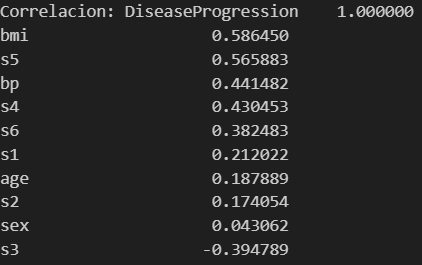

Por las correlaciones decido que debo eliminar la columna s3 debido a que tiene un valor negativo. Además, veo que la columna bmi y s5, y bp y s4 tienen una correlacion muy parecida por lo que deberíamos eliminar una de las dos.

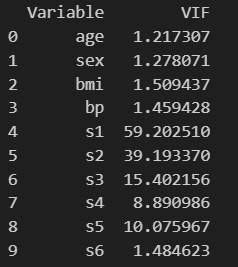

Debido a que el vif es muy alto decido en las columnas s1, s2, s3, s4 y s5 decido que debemos eliminarlas.

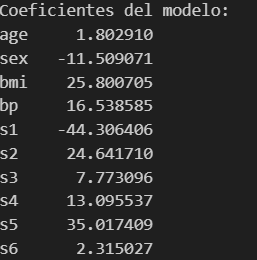

Por último, debido a que las columnas s1 y sex tienen unos coeficientes muy bajos decido que también deben ser eliminadas para entrnar nuestro modelo.

Por lo que como conclusión, eliminaré las columnas s1, s2, s3, s4, s5 y sex.

In [ ]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Cargar el dataset de Diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["DiseaseProgression"] = diabetes.target  # Variable objetivo

# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["DiseaseProgression", "s1", "s2", "s3", "s4", "s5", "sex"])  # Variables predictoras
y = df["DiseaseProgression"]  # Variable objetivo

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de DiseaseProgression: {y.min()}")
print(f"Valor máximo de DiseaseProgression: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["DiseaseProgression"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["DiseaseProgression"].sort_values(ascending=False)
print(correlaciones)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_data)
# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)

print("Intercepto:", modelo.intercept_)
print("Coeficientes del modelo:")
print(coeficientes)

# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

Valor mínimo de DiseaseProgression: 25.0
Valor máximo de DiseaseProgression: 346.0
DiseaseProgression    1.000000
bmi                   0.586450
bp                    0.441482
s6                    0.382483
age                   0.187889
Name: DiseaseProgression, dtype: float64
  Variable       VIF
0      age  1.172270
1      bmi  1.283947
2       bp  1.362082
3       s6  1.324678


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

Hemos eliminado las columnas mencionadas anteriormente y podemos ver que el modelo nos ha dado un peor resultado. La razón seguramente se deba a que tiene pocas variables con las que trabajar, y debamos buscar nuevas variables que puedan ayudarnos a mejorar el modelo o buscar un modelo que se adapte mejor a nuestro problema.